In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from shapely.geometry import Polygon

from sentinelhub import FisRequest, BBox, Geometry, CRS, WcsRequest, CustomUrlParam, \
    DataSource, HistogramType
from sentinelhub.time_utils import iso_to_datetime

In [2]:
INSTANCE_ID = '31bd9585-8cfe-4fa3-aa15-5f1b528ab12e'

In [3]:
sahara_bbox = BBox((1.0, 26.0, 1.3, 25.7), CRS.WGS84)
time_interval = ('2018-02-01', '2018-05-01')

In [15]:
fis_request = FisRequest(layer='BANDS',
                         geometry_list=[sahara_bbox],
                         time=time_interval,
                         resolution='70m',
                         data_folder='./data',
                         instance_id=INSTANCE_ID)

In [16]:
fis_data = fis_request.get_data(save_data=True)

In [17]:
fis_data[0]['C0'][0]

{'date': '2018-04-30',
 'basicStats': {'min': 0.13920000195503235,
  'max': 0.27570000290870667,
  'mean': 0.16789785506033855,
  'stDev': 0.008559078210439466}}

In [7]:
def fis_data_to_dataframe(fis_data):
    """ Creates a DataFrame from list of FIS responses
    """
    COLUMNS = ['channel', 'date', 'min', 'max', 'mean', 'stDev']
    data = []

    for fis_response in fis_data:
        for channel, channel_stats in fis_response.items():
            for stat in channel_stats:
                row = [int(channel[1:]), iso_to_datetime(stat['date'])]

                for column in COLUMNS[2:]:
                    row.append(stat['basicStats'][column])

                data.append(row)

    return pd.DataFrame(data, columns=COLUMNS).sort_values(['channel', 'date'])


df = fis_data_to_dataframe(fis_data)

In [8]:
df

,channel,date,min,max,mean,stDev
17,0,2018-02-04,0.1715,0.2577,0.185660,0.005714
16,0,2018-02-09,0.1478,0.2760,0.169501,0.007592
15,0,2018-02-14,0.1165,0.3047,0.170285,0.013389
14,0,2018-02-19,0.1327,0.2658,0.170829,0.015263
13,0,2018-02-24,0.4789,1.0189,0.730869,0.105041
...,...,...,...,...,...,...
220,12,2018-04-10,0.1020,0.5807,0.260120,0.095357
219,12,2018-04-15,0.3007,0.6025,0.460584,0.033551
218,12,2018-04-20,0.2926,0.5892,0.462507,0.035175
217,12,2018-04-25,0.1031,0.5932,0.447324,0.047799


d:\campuz\4 yr\research-final\env\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


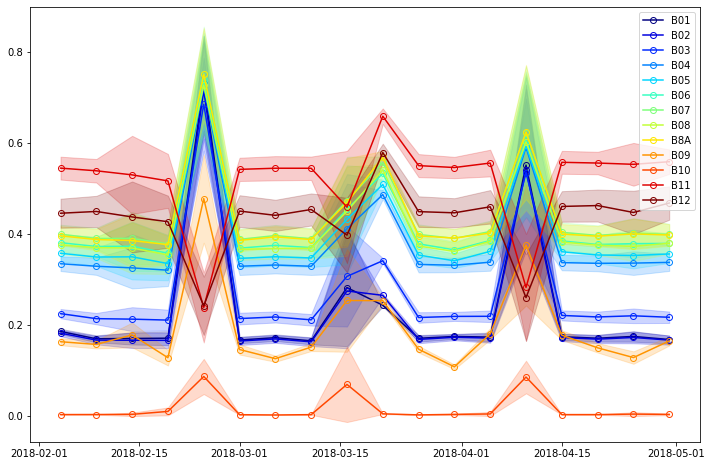

In [9]:
BANDS = 'B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B10,B11,B12'.split(',')

plt.figure(figsize=(12, 8))
for channel, (band, color) in enumerate(zip(BANDS, cm.jet(np.linspace(0, 1, 13)))):
    channel_df = df[df.channel == channel]
    plt.plot(channel_df.date, channel_df['mean'], '-o', markeredgewidth=1,
             color=color, markerfacecolor='None', label=band)
    plt.fill_between(list(channel_df.date),  channel_df['mean'] - channel_df['stDev'],
                     channel_df['mean'] + channel_df['stDev'], alpha=0.2, color=color)

plt.legend(loc='upper right');